In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [2]:
#alter the path to the dataset when using in different computer
path = "D:/Computer Engineering/Second Semester/Mobile Computing/Final Project Artefacts/Android Datasets/train_data_mean.csv"
data = pd.read_csv(path,header=None)
print(data.shape)
data_split = 700
classifiers = ['NeuralNets','Tree','KNN','LogReg']
train_scores = []
test_scores = []

(936, 3)


In [3]:
train_features = data.values[:data_split,[0,1]]
train_labels = data.values[:data_split,[2]]
test_features = data.values[data_split:,[0,1]]
test_labels = data.values[data_split:,[2]]

1. Neural Networks

In [4]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV

In [5]:
parameters = {
    'hidden_layer_sizes' : np.arange(10,30)
}
cls = GridSearchCV(MLPClassifier(max_iter=1000),parameters,verbose=4,iid=True, cv=3, n_jobs=-1)
print(cls)

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'hidden_layer_sizes': array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)


In [6]:
model = cls.fit(train_features,train_labels.ravel())
print(model.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  53 out of  60 | elapsed:   12.9s remaining:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   14.2s finished


{'hidden_layer_sizes': 23}


In [7]:
train_scores.append(model.best_score_)

In [8]:
test_scores.append(model.best_estimator_.score(test_features, test_labels))
#model.best_estimator_.score(test_features, test_labels)

2. Decision Trees

In [9]:
from sklearn.tree import DecisionTreeClassifier

parameters = {'max_depth': range(3,10)}
tree = GridSearchCV(DecisionTreeClassifier(),parameters,verbose=4,iid=True, cv=3, n_jobs=-1)

In [10]:
model_tree = tree.fit(train_features,train_labels)
print(model_tree.best_params_)

Fitting 3 folds for each of 7 candidates, totalling 21 fits
{'max_depth': 7}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  21 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  10 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished


In [11]:
model_tree.best_score_

0.9614285714285714

In [12]:
train_scores.append(model_tree.best_score_)
test_scores.append(model_tree.best_estimator_.score(test_features,test_labels))

3. Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
parameters = {
    'C' : np.arange(0.1,1.0)
}
log_model = GridSearchCV(LogisticRegression(), parameters,iid=True, cv=3, n_jobs=-1)

In [14]:
log_model.fit(train_features,train_labels)
print(log_model.best_params_)

{'C': 0.1}


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\prash\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
train_scores.append(log_model.best_score_)
test_scores.append(log_model.best_estimator_.score(test_features, test_labels))

4. KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
parameters = {
    'n_neighbors' : np.arange(3,9,2)
}

instance_model = GridSearchCV(KNeighborsClassifier(),parameters, iid=True, cv=3, n_jobs=-1)

In [17]:
instance_model.fit(train_features,train_labels)
print(instance_model.best_params_)
train_scores.append(instance_model.best_score_)
test_scores.append(instance_model.best_estimator_.score(test_features, test_labels))

{'n_neighbors': 5}


C:\Users\prash\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [18]:
print(train_scores)
print(test_scores)

[0.8042857142857143, 0.9614285714285714, 0.7714285714285715, 0.9271428571428572]
[0.8177966101694916, 0.7966101694915254, 0.7754237288135594, 0.6949152542372882]


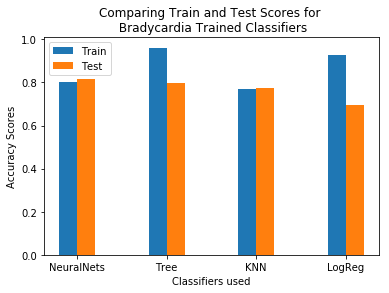

In [19]:
fig, ax = plt.subplots()
index = 0.20
ind = np.arange(4)
width=0.20
ax.bar(ind,train_scores,0.20,label="Train")
ax.bar(ind + width ,test_scores,0.20,label="Test")
plt.xlabel('Classifiers used')
plt.xticks(ind + width / 2, classifiers)
plt.ylabel('Accuracy Scores')
plt.legend(loc='best')
plt.title('Comparing Train and Test Scores for \n Bradycardia Trained Classifiers')
plt.show()



In [21]:
# saving the trained models
import pickle

pickle.dump(log_model,open("log_reg.pkl",'wb'))
pickle.dump(instance_model,open("knn.pkl",'wb'))
pickle.dump(model,open("mlp.pkl",'wb'))
pickle.dump(model_tree,open("tree.pkl",'wb'))